In [597]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'C:\\Users\\v-mariamz'

In [6]:
df = pd.read_csv(r"C:\Users\v-mariamz\Downloads\test_assignment\dat_mariam_preprocessed.csv")
df

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,hits,pageviews,transactionRevenue,...,isMobile,continent,subContinent,country,campaign,source,medium,transactionRevenueBias,transactionRevenueLog,transactionRevenueBinom
0,Affiliates,2016-08-03,8.112932e+18,8112931553428033220_1470276675,1470276675,1,1470276675,1,1,0.0,...,false,Oceania,Australasia,Australia,Data Share Promo,Partners,affiliate,1,0.0,0
1,Affiliates,2016-08-04,1.293288e+18,1293287886935508161_1470379113,1470379113,3,1470379113,2,2,0.0,...,false,Asia,Eastern Asia,Japan,Data Share Promo,Partners,affiliate,1,0.0,0
2,Affiliates,2016-08-04,5.233172e+18,5233171936454968672_1470352571,1470352571,1,1470352571,1,1,0.0,...,true,Europe,Eastern Europe,Ukraine,Data Share Promo,Partners,affiliate,1,0.0,0
3,Affiliates,2016-08-04,7.553271e+18,7553270564107563637_1470324925,1470324925,1,1470324925,5,5,0.0,...,false,Europe,Northern Europe,United Kingdom,Data Share Promo,Partners,affiliate,1,0.0,0
4,Affiliates,2016-08-04,7.942509e+18,7942508630272684505_1470323139,1470323139,1,1470323139,1,1,0.0,...,false,Europe,Southern Europe,Italy,Data Share Promo,Partners,affiliate,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23025,Social,2017-07-31,2.205251e+17,220525088054127012_1501515340,1501515340,1,1501515340,7,7,0.0,...,false,Europe,Southern Europe,Serbia,not set,youtubecom,referral,1,0.0,0
23026,Social,2017-07-31,1.437044e+18,1437044458708551234_1501513186,1501513186,1,1501513186,1,1,0.0,...,false,Europe,Western Europe,Germany,not set,youtubecom,referral,1,0.0,0
23027,Social,2017-07-31,7.707399e+18,7707398618444494456_1501553876,1501553876,1,1501553876,2,2,0.0,...,false,Americas,Central America,Mexico,not set,youtubecom,referral,1,0.0,0
23028,Social,2017-07-31,7.738385e+18,7738384993815386906_1501538396,1501538396,1,1501538396,2,2,0.0,...,false,Americas,Central America,Mexico,not set,youtubecom,referral,1,0.0,0


## Univariate Analysis

In [15]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'hits', 'pageviews',
       'transactionRevenue', 'browser', 'operatingSystem', 'isMobile',
       'continent', 'subContinent', 'country', 'campaign', 'source', 'medium',
       'transactionRevenueBias', 'transactionRevenueLog',
       'transactionRevenueBinom'],
      dtype='object')

In [390]:
## Examining value counts of different categorical variables
df['channelGrouping'].value_counts()
df['browser'].value_counts()
df['continent'].value_counts()
df['subContinent'].value_counts()
df['operatingSystem'].value_counts()
df['country'].value_counts()
df['campaign'].value_counts()
df['source'].value_counts()
df['medium'].value_counts()

In [387]:
categorical = df[['channelGrouping', 'browser', 'operatingSystem',
       'continent', 'subContinent', 'campaign','medium']]

Graph for channelGrouping: total = 8


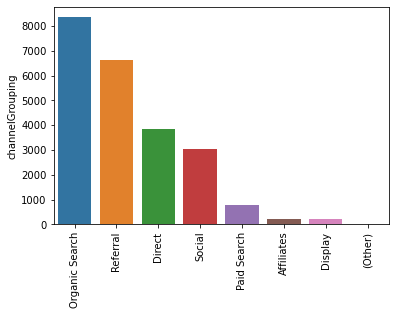

Graph for browser: total = 22


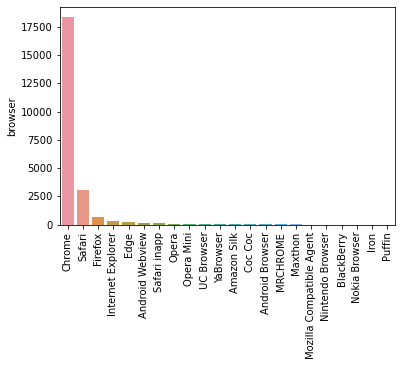

Graph for operatingSystem: total = 15


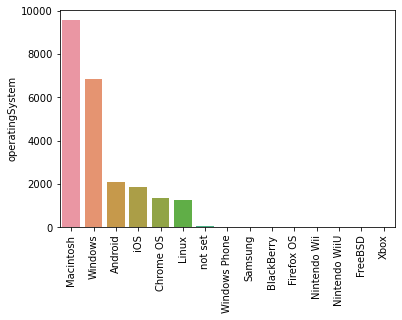

Graph for continent: total = 6


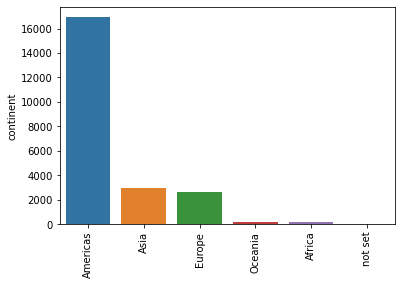

Graph for subContinent: total = 22


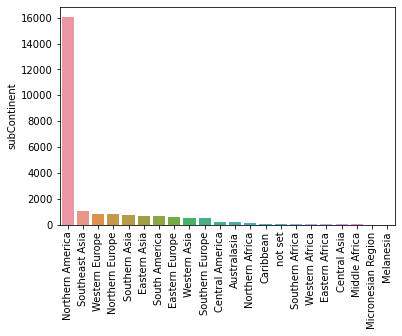

Graph for campaign: total = 8


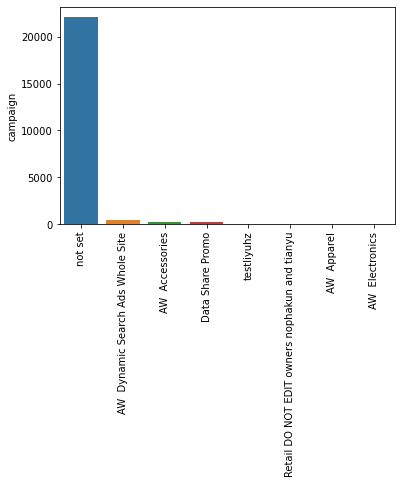

Graph for medium: total = 7


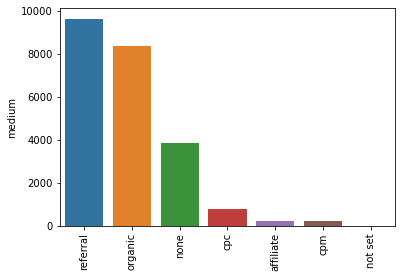

In [388]:
## Plotting categorical columns 
for i in categorical.columns:
    vc = categorical[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(vc)))
    chart = sns.barplot(x=vc.index, y=vc)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

<AxesSubplot:ylabel='Density'>

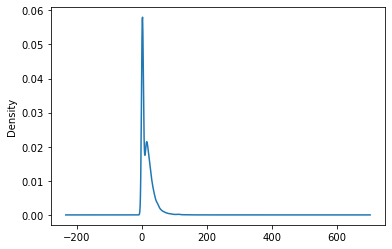

In [95]:
df['pageviews'].plot.density()

In [201]:
## Transforming the date variable and extracting day,weekday,month and year 
def date_decompose(df):
    df['date2'] = pd.to_datetime(df["date"])
    df["weekday"] = df['date'].dt.weekday 
    df["day"] = df['date'].dt.day 
    df["month"] = df['date'].dt.month 
    df["year"] = df['date'].dt.year 
    df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    return df
date_decompose(df)
df.drop(columns = 'date',inplace = True)
df.rename(columns = {'date2':'date'},inplace = True)

In [225]:
df_dates = df[['weekday', 'day', 'month', 'year',
       'visitHour']]
df_dates

,weekday,day,month,year,visitHour
0,2,3,8,2016,6
1,3,4,8,2016,10
2,3,4,8,2016,3
3,3,4,8,2016,19
4,3,4,8,2016,19
...,...,...,...,...,...
23025,0,31,7,2017,19
23026,0,31,7,2017,18
23027,0,31,7,2017,6
23028,0,31,7,2017,1


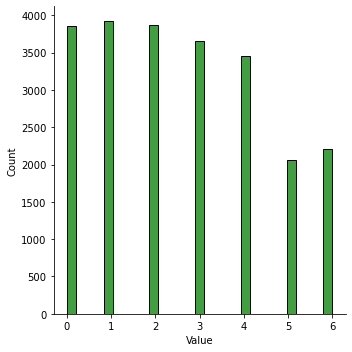

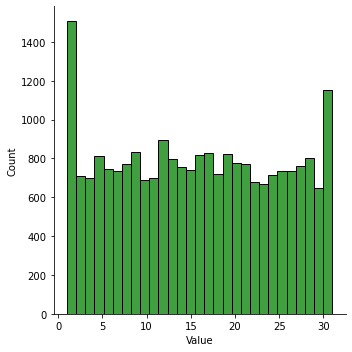

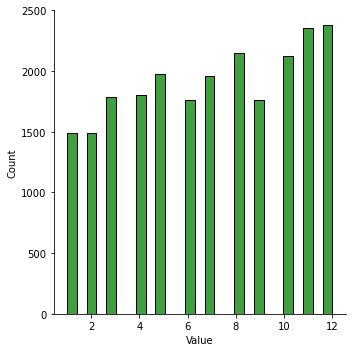

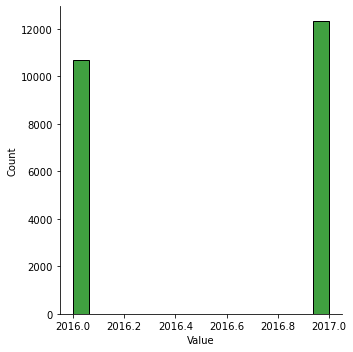

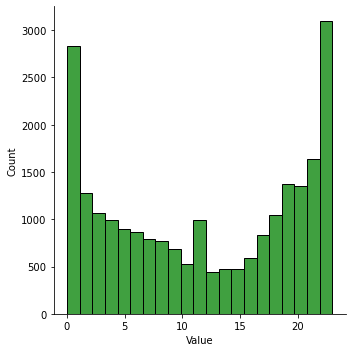

In [257]:
## Drawing insights from dates, seeing which weekday,day,month,visit hour and year was most popular
df2 = df_dates.stack().reset_index(level=1).rename(columns={'level_1': 'Date', 0: 'Value'})
p.map(sns.displot, 'Value',color='green')
p.set(xlim=(0, 1.0))

## Correlations

<AxesSubplot:>

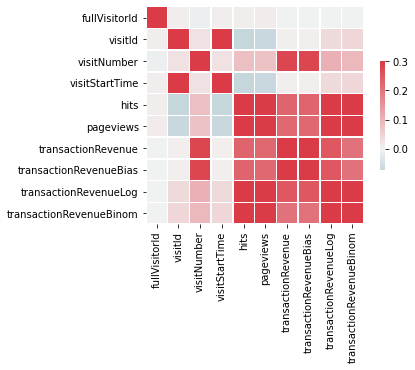

In [99]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [437]:
##Checking for correlations with the target variable 
df[['visitNumber','visitStartTime','hits',
    'weekday', 'day', 'month', 'year',
    'visitHour','transactionRevenue','sessionId', 'visitId','fullVisitorId']].corr()['transactionRevenue'][:]

visitNumber           0.278470
visitStartTime        0.006561
hits                  0.229274
weekday              -0.036715
day                   0.003712
month                -0.016030
year                  0.012865
visitHour             0.013776
transactionRevenue    1.000000
visitId               0.006561
fullVisitorId        -0.000276
Name: transactionRevenue, dtype: float64

In [438]:
df[['visitNumber','visitStartTime','hits',
    'weekday', 'day', 'month', 'year',
    'visitHour','transactionRevenueBinom','sessionId', 'visitId','fullVisitorId']].corr()['transactionRevenueBinom'][:]

visitNumber                0.094990
visitStartTime             0.043481
hits                       0.584999
weekday                   -0.059570
day                       -0.006261
month                     -0.011435
year                       0.032300
visitHour                 -0.036760
transactionRevenueBinom    1.000000
visitId                    0.043481
fullVisitorId             -0.000286
Name: transactionRevenueBinom, dtype: float64

In [428]:
numerical_variables = df[['visitNumber','visitStartTime','hits','pageviews',
                           'weekday', 'day', 'month', 'year',
                           'visitHour','transactionRevenue']]

In [429]:
## Checking for multicollinearity by using the VIF scores
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
vif_scores(numerical_variables)
## Looks like hits and pageviews have high VIF 
## which means they explain the same variance within this dataset
## I am going to remove one of them

,Independent Features,VIF Scores
0,visitNumber,1.086167
1,visitStartTime,1.398007
2,hits,38.121349
3,pageviews,37.976496
4,weekday,1.002506
5,day,1.005195
6,month,1.293005
7,year,0.002257
8,visitHour,1.003078
9,transactionRevenue,1.139266


In [430]:
numerical_variables2 = df[['visitNumber','visitStartTime','hits',
                           'weekday', 'day', 'month', 'year',
                           'visitHour','transactionRevenue']]
vif_scores(numerical_variables2)

,Independent Features,VIF Scores
0,visitNumber,1.086074
1,visitStartTime,1.397794
2,hits,1.063170
3,weekday,1.002411
4,day,1.005193
5,month,1.292590
6,year,0.002257
7,visitHour,1.002564
8,transactionRevenue,1.138746


## Bivariate Analysis

<AxesSubplot:ylabel='browser'>

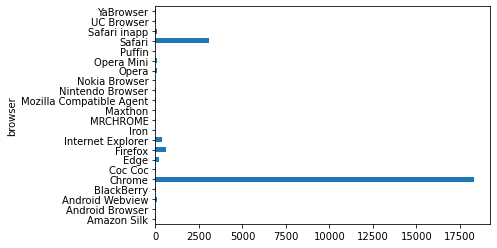

In [678]:
df.groupby('browser')['transactionRevenue'].count().plot(kind='barh')

<AxesSubplot:ylabel='channelGrouping'>

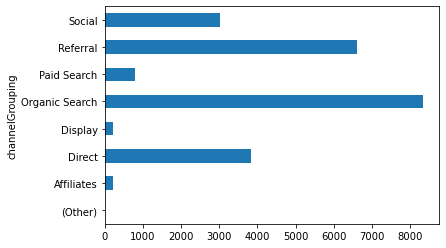

In [677]:
df.groupby('channelGrouping')['transactionRevenue'].count().plot(kind='barh')

<AxesSubplot:ylabel='operatingSystem'>

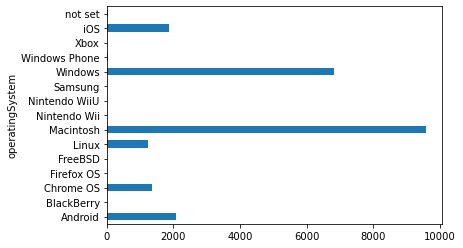

In [676]:
df.groupby('operatingSystem')['transactionRevenue'].count().plot(kind='barh')

<AxesSubplot:ylabel='subContinent'>

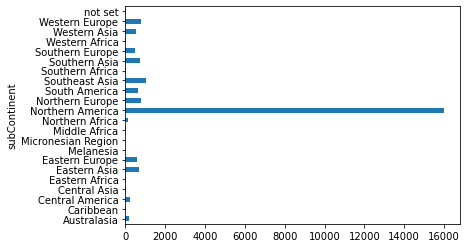

In [675]:
df.groupby('subContinent')['transactionRevenue'].count().plot(kind='barh')

<AxesSubplot:ylabel='continent'>

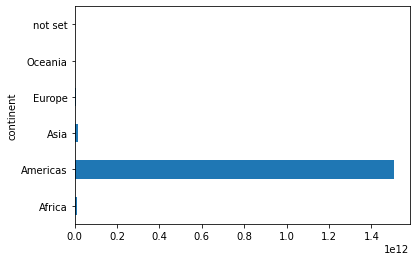

In [673]:
df.groupby('continent')['transactionRevenue'].sum().plot(kind='barh')

<AxesSubplot:ylabel='isMobile'>

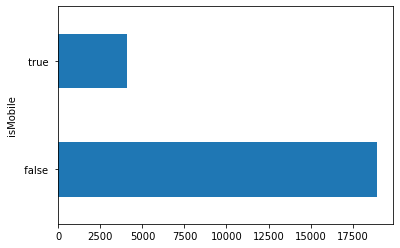

In [672]:
df.groupby('isMobile')['transactionRevenue'].count().plot(kind='barh')

<AxesSubplot:ylabel='medium'>

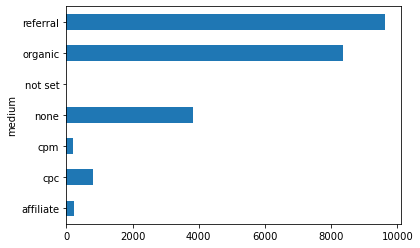

In [671]:
df.groupby('medium')['transactionRevenue'].count().plot(kind='barh')

<AxesSubplot:xlabel='weekday'>

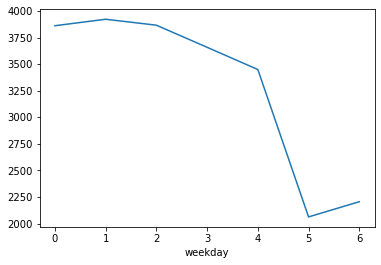

In [670]:
df.groupby(['weekday'])['transactionRevenue'].count().plot()

<AxesSubplot:xlabel='month'>

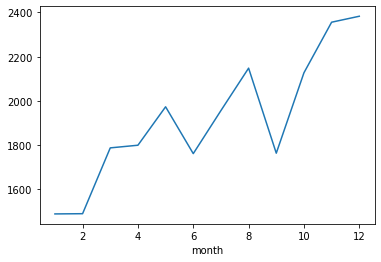

In [669]:
df.groupby(['month'])['transactionRevenue'].count().plot()

<AxesSubplot:xlabel='day'>

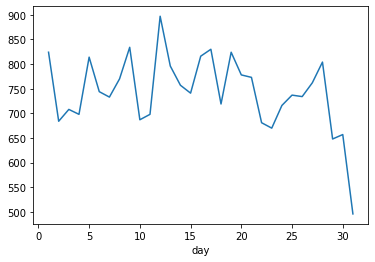

In [207]:
df.groupby(['day'])['transactionRevenue'].count().plot()

In [655]:
pd.pivot_table(df, index = ['subContinent'], values = 'transactionRevenue',aggfunc = 'sum')

,transactionRevenue
subContinent,
Australasia,1.793230e+09
Caribbean,1.563550e+09
Central America,1.905550e+09
Central Asia,3.498000e+07
Eastern Africa,5.268700e+09
Eastern Asia,1.107522e+10
Eastern Europe,9.468000e+08
Melanesia,0.000000e+00
Micronesian Region,0.000000e+00


In [682]:
pd.pivot_table(df, index = ['hits'], values = 'transactionRevenue',aggfunc = 'sum')

,transactionRevenue
hits,
1,0.000000e+00
2,1.214500e+09
3,2.111800e+08
4,9.943000e+08
5,2.282030e+09
...,...
386,4.719200e+08
387,8.887000e+07
445,7.485000e+07


In [683]:
pd.pivot_table(df, index = ['pageviews'], values = 'transactionRevenue',aggfunc = 'sum')

,transactionRevenue
pageviews,
0,0.000000e+00
1,0.000000e+00
2,1.214500e+09
3,2.111800e+08
4,9.943000e+08
...,...
358,7.485000e+07
400,1.339500e+08
431,1.720930e+09


## Visitors Analysis

In [260]:
## 21116 visitors who only visited the webshop once, 1914 visited more than once
df['fullVisitorId'].nunique() 

21116

In [337]:
visitor_num = df[['fullVisitorId','hits', 'pageviews',
       'transactionRevenue']]
r = (visitor_num['hits'] == visitor_num ['pageviews']) ## had suspicion that pageviews and hits had the same values but it turned out to be untrue
r.value_counts()

False    12430
True     10600
dtype: int64

In [338]:
agg = visitor_num.groupby(['fullVisitorId']).sum().reset_index()
agg

,fullVisitorId,hits,pageviews,transactionRevenue
0,6.476721e+13,1,1,0.0
1,1.664653e+14,12,10,0.0
2,1.766520e+14,1,1,0.0
3,2.131311e+14,14,13,33590000.0
4,2.669269e+14,16,12,0.0
...,...,...,...,...
21111,9.997409e+18,86,65,32360000.0
21112,9.997595e+18,3,3,0.0
21113,9.998597e+18,37,33,97200000.0
21114,9.998996e+18,16,16,59980000.0


In [371]:
agg[agg['transactionRevenue']>0] ## out of 21116, only 9996 contributed to revenue

,fullVisitorId,hits,pageviews,transactionRevenue
3,2.131311e+14,14,13,33590000.0
6,4.353241e+14,14,11,44790000.0
7,5.626781e+14,18,16,95700000.0
8,5.857089e+14,22,20,43970000.0
9,6.707220e+14,17,17,37980000.0
...,...,...,...,...
21104,9.991633e+18,17,16,33590000.0
21109,9.994767e+18,42,30,134320000.0
21111,9.997409e+18,86,65,32360000.0
21113,9.998597e+18,37,33,97200000.0


In [329]:
## Valuable customers, these are the top 10% of the highest paying customers from the dataset
valuables = agg[agg['transactionRevenue']>agg.transactionRevenue.quantile(0.9)]
valuables['whale'] = 1 ## adding a variable to signify if a customer is in the top 10% or not
valuables = valuables[['fullVisitorId','whale']]
df = df.merge(valuables,how = 'left', on = 'fullVisitorId')
df.fillna(0,inplace=True)

In [380]:
##Extracting number of visits from visitNumber
visits= df[['fullVisitorId','visitNumber']]
v= visits.sort_values(ascending = False, by = 'visitNumber')
v.drop_duplicates(subset='fullVisitorId', keep='first', inplace=True)
v.rename(columns = {'visitNumber':'visits'},inplace = True)

In [384]:
## Lingering visitors, those who visit the webshop often but don't purchase anything
p = agg.merge(v,how='left',on = 'fullVisitorId')
non_paying = p[p['transactionRevenue']==0] ## visitors who did not contribute to revenue
non_paying[non_paying['visits']>5] ## choosing a threshold of 5, these are the visitors who visit the webshop 
                                        ## but don't purchase anything

,fullVisitorId,hits,pageviews,transactionRevenue,visits
20,2.230855e+15,6,6,0.0,6
53,6.619758e+15,51,40,0.0,9
75,9.200564e+15,4,4,0.0,6
280,4.145438e+16,1,1,0.0,6
304,4.567132e+16,1,1,0.0,8
...,...,...,...,...,...
21019,9.957622e+18,3,3,0.0,12
21024,9.959640e+18,3,3,0.0,11
21027,9.960140e+18,1,1,0.0,11
21031,9.962111e+18,2,2,0.0,18


## Feature Selection

In [482]:
df.columns

Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'hits', 'pageviews',
       'transactionRevenue', 'browser', 'operatingSystem', 'isMobile',
       'continent', 'subContinent', 'country', 'campaign', 'source', 'medium',
       'transactionRevenueBias', 'transactionRevenueLog',
       'transactionRevenueBinom', 'date', 'weekday', 'day', 'month', 'year',
       'visitHour', 'whale'],
      dtype='object')

In [477]:
## Binning 
white_list = ['google','mallgoogleplexcom','direct','youtubecom','Partners']
def source_binning(df):
    for i in df['source']:
        if i not in white_list:
            df['source'].replace(i,'Other',inplace = True)
    return df
source_binning(df)

In [503]:
pd.get_dummies(features, drop_first = True)

,fullVisitorId,visitId,visitNumber,visitStartTime,hits,date,weekday,day,month,year,...,source_direct,source_google,source_mallgoogleplexcom,source_youtubecom,medium_cpc,medium_cpm,medium_none,medium_not set,medium_organic,medium_referral
0,8.112932e+18,1470276675,1,1470276675,1,2016-08-03,2,3,8,2016,...,0,0,0,0,0,0,0,0,0,0
1,1.293288e+18,1470379113,3,1470379113,2,2016-08-04,3,4,8,2016,...,0,0,0,0,0,0,0,0,0,0
2,5.233172e+18,1470352571,1,1470352571,1,2016-08-04,3,4,8,2016,...,0,0,0,0,0,0,0,0,0,0
3,7.553271e+18,1470324925,1,1470324925,5,2016-08-04,3,4,8,2016,...,0,0,0,0,0,0,0,0,0,0
4,7.942509e+18,1470323139,1,1470323139,1,2016-08-04,3,4,8,2016,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23025,2.205251e+17,1501515340,1,1501515340,7,2017-07-31,0,31,7,2017,...,0,0,0,1,0,0,0,0,0,1
23026,1.437044e+18,1501513186,1,1501513186,1,2017-07-31,0,31,7,2017,...,0,0,0,1,0,0,0,0,0,1
23027,7.707399e+18,1501553876,1,1501553876,2,2017-07-31,0,31,7,2017,...,0,0,0,1,0,0,0,0,0,1
23028,7.738385e+18,1501538396,1,1501538396,2,2017-07-31,0,31,7,2017,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.columns

In [638]:
features = df[['channelGrouping','fullVisitorId', 'visitId',
       'visitNumber', 'visitStartTime', 'hits', 
       'browser', 'operatingSystem', 'isMobile','country', 'source', 'medium',
        'weekday', 'day', 'month', 'year',
       'visitHour']]
## dropping pageviews because of high VIF and campaign due to little to no information
## also dropping continent and subContinent
target = df[['transactionRevenueBinom']]

In [639]:
features_dummies = pd.get_dummies(features, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(features_dummies, target, test_size=0.2, random_state=42)

In [640]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [641]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [642]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.2s
[CV 2/5] END ...............................model__alpha=0.1; total time=   0.2s
[CV 3/5] END ...............................model__alpha=0.1; total time=   0.2s
[CV 4/5] END ...............................model__alpha=0.1; total time=   0.2s
[CV 5/5] END ...............................model__alpha=0.1; total time=   0.2s
[CV 1/5] END ...............................model__alpha=0.2; total time=   0.2s
[CV 2/5] END ...............................model__alpha=0.2; total time=   0.2s
[CV 3/5] END ...............................model__alpha=0.2; total time=   0.2s
[CV 4/5] END ...............................model__alpha=0.2; total time=   0.2s
[CV 5/5] END ...............................model__alpha=0.2; total time=   0.2s
[CV 1/5] END ...............model__alpha=0.30000000000000004; total time=   0.2s
[CV 2/5] END ...............model__alpha=0.3000

[CV 2/5] END ...............................model__alpha=2.1; total time=   0.2s
[CV 3/5] END ...............................model__alpha=2.1; total time=   0.2s
[CV 4/5] END ...............................model__alpha=2.1; total time=   0.2s
[CV 5/5] END ...............................model__alpha=2.1; total time=   0.2s
[CV 1/5] END ...............................model__alpha=2.2; total time=   0.2s
[CV 2/5] END ...............................model__alpha=2.2; total time=   0.2s
[CV 3/5] END ...............................model__alpha=2.2; total time=   0.2s
[CV 4/5] END ...............................model__alpha=2.2; total time=   0.2s
[CV 5/5] END ...............................model__alpha=2.2; total time=   0.2s
[CV 1/5] END ................model__alpha=2.3000000000000003; total time=   0.2s
[CV 2/5] END ................model__alpha=2.3000000000000003; total time=   0.2s
[CV 3/5] END ................model__alpha=2.3000000000000003; total time=   0.2s
[CV 4/5] END ...............

[CV 4/5] END ...............................model__alpha=4.1; total time=   0.2s
[CV 5/5] END ...............................model__alpha=4.1; total time=   0.2s
[CV 1/5] END ...............................model__alpha=4.2; total time=   0.2s
[CV 2/5] END ...............................model__alpha=4.2; total time=   0.2s
[CV 3/5] END ...............................model__alpha=4.2; total time=   0.2s
[CV 4/5] END ...............................model__alpha=4.2; total time=   0.2s
[CV 5/5] END ...............................model__alpha=4.2; total time=   0.2s
[CV 1/5] END ...............................model__alpha=4.3; total time=   0.2s
[CV 2/5] END ...............................model__alpha=4.3; total time=   0.2s
[CV 3/5] END ...............................model__alpha=4.3; total time=   0.2s
[CV 4/5] END ...............................model__alpha=4.3; total time=   0.2s
[CV 5/5] END ...............................model__alpha=4.3; total time=   0.2s
[CV 1/5] END ...............

[CV 1/5] END ...............................model__alpha=6.2; total time=   0.2s
[CV 2/5] END ...............................model__alpha=6.2; total time=   0.2s
[CV 3/5] END ...............................model__alpha=6.2; total time=   0.2s
[CV 4/5] END ...............................model__alpha=6.2; total time=   0.2s
[CV 5/5] END ...............................model__alpha=6.2; total time=   0.2s
[CV 1/5] END ...............................model__alpha=6.3; total time=   0.2s
[CV 2/5] END ...............................model__alpha=6.3; total time=   0.2s
[CV 3/5] END ...............................model__alpha=6.3; total time=   0.2s
[CV 4/5] END ...............................model__alpha=6.3; total time=   0.2s
[CV 5/5] END ...............................model__alpha=6.3; total time=   0.1s
[CV 1/5] END ...............................model__alpha=6.4; total time=   0.2s
[CV 2/5] END ...............................model__alpha=6.4; total time=   0.2s
[CV 3/5] END ...............

[CV 3/5] END ...............................model__alpha=8.2; total time=   0.2s
[CV 4/5] END ...............................model__alpha=8.2; total time=   0.2s
[CV 5/5] END ...............................model__alpha=8.2; total time=   0.2s
[CV 1/5] END ...............................model__alpha=8.3; total time=   0.2s
[CV 2/5] END ...............................model__alpha=8.3; total time=   0.2s
[CV 3/5] END ...............................model__alpha=8.3; total time=   0.2s
[CV 4/5] END ...............................model__alpha=8.3; total time=   0.2s
[CV 5/5] END ...............................model__alpha=8.3; total time=   0.2s
[CV 1/5] END ...............................model__alpha=8.4; total time=   0.2s
[CV 2/5] END ...............................model__alpha=8.4; total time=   0.2s
[CV 3/5] END ...............................model__alpha=8.4; total time=   0.2s
[CV 4/5] END ...............................model__alpha=8.4; total time=   0.2s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [643]:
search.best_params_

{'model__alpha': 0.1}

In [644]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

In [645]:
importance

array([0.        , 0.        , 0.        , 0.        , 0.13385794,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [665]:
np.array(features_dummies.columns)[importance > 0]

array(['hits', 'country_United States', 'source_mallgoogleplexcom'],
      dtype=object)

In [686]:
np.array(features_dummies.columns)[rfe.support_ == True]

array(['fullVisitorId', 'visitId', 'visitNumber', 'visitStartTime',
       'hits', 'weekday', 'year', 'visitHour',
       'channelGrouping_Organic Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'browser_Chrome', 'browser_Safari',
       'operatingSystem_Macintosh', 'operatingSystem_Windows',
       'isMobile_ true ', 'country_United States',
       'source_mallgoogleplexcom', 'source_youtubecom', 'medium_organic'],
      dtype=object)

In [694]:
logit_cols = features_dummies[['hits', 'country_United States', 'source_mallgoogleplexcom']]
X_train, X_test, y_train, y_test = train_test_split(logit_cols, target, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [697]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2164,  131],
       [ 122, 2189]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

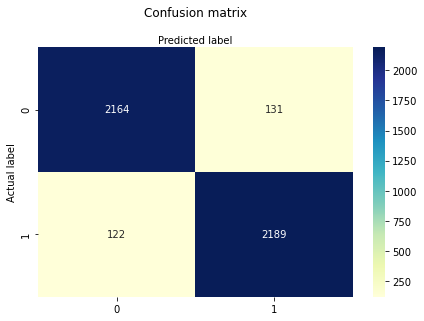

In [700]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [696]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9450716456795484
Precision: 0.9435344827586207
Recall: 0.9472090004327132


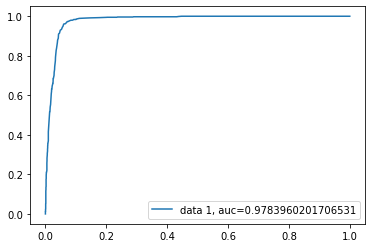

In [698]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Linear Regression

In [717]:
features_ = df[df['transactionRevenue']>0]
features_reg_dummies = pd.get_dummies(features_, drop_first = True)
features_reg = features_reg_dummies[['hits', 'country_United States', 'source_mallgoogleplexcom']]
target_reg = features_reg_dummies["transactionRevenue"]
X_train, X_test, y_train, y_test = train_test_split(features_reg, target_reg, test_size=0.2, random_state=42)

In [719]:
LR = LinearRegression()
LR.fit(X_train,y_train)
print(LR.intercept_)
print(LR.coef_)
y_pred = LR.predict(X_test)
y_pred

65874485.85191129
[  1947329.29986939   -106392.27245829 -13456356.36621013]


array([1.16398655e+08, 1.88449839e+08, 1.82607852e+08, ...,
       1.16398655e+08, 1.82607852e+08, 9.71003111e+07])

In [720]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
11137,2.658000e+07,1.163987e+08
3995,1.012190e+09,1.884498e+08
5795,9.229400e+08,1.826079e+08
18300,8.114000e+07,9.904764e+07
8253,1.899000e+07,1.358719e+08
...,...,...
1631,7.271600e+08,2.643957e+08
13958,3.794000e+07,1.009950e+08
2382,1.099000e+07,1.163987e+08
3088,3.359000e+07,1.826079e+08
